# CoSaMP (Compressive Sampling Matching Pursuit)
CoSaMP  is a greedy algorithm.

#Algorithm
 
## A. Initialization

At first, y is set to a residual $r$, estimated signal $z$ is zero vector, and support set $S$ to be empty

$$
z_0 = O     \\
r_0 = y     \\
S_0 = \phi  \\
$$


In [15]:
    # in class Greedy
    def __init__(self, A, y):  
        
        # Initialization
        self.z  = np.zeros(self.n, dtype=np.complex)
        self.r  = self.y
        

    # in class CoSaMP
    def __init__(self, A, y, k):
        
        self.S  = set([]) # support set(indexes)


## B. Iteration

### 1. Update the support set
adding supports to the support set

$$ U^{n+1} = supp(z_n) ~ \bigcup ~ L_{2k} \left( A^* r_{i-1} \right) $$

where $L_k$ is a hard thresholding operator to get the idexes of $k$ largest entries.

### 2. $l_2$ minimization

Combine columns of which indexes are in the support set $S$, as $A_s$.

$$ A_s = \{ A_k ~|~ k \in S_i \} $$

Next, do $l_2$ minimization by using the pseudo inverse matrix of $A_s$.

$$ \hat{u}_i = {A_s}^- y  $$

### 3. Hard thresholding

$$ \hat{z}_i = H_k \left( \hat{u}_i \right) $$

### 4. Update residual
$$ r_i  = y - A \hat{z}_{i} $$

In [2]:
    def iterate(self):    

        # update support sets 
        z        = np.dot( np.conj(self.A.T), self.r ) 
        s        = indexThresholding(z, 2*self.k)
        self.S  |= set(s)
        
        As  = self.A[:, sorted(self.S)]  # pick up columns which have the index in S
        us  = np.dot( np.linalg.pinv(As), self.y )  # solve least square
        u   = np.zeros(self.A.shape[1], dtype=np.complex)
        for j, s in enumerate(sorted(self.S)):
            u[s] = us[j]

        return hardThresholding(u, self.k)
    

## Demo

### 1. prepare test signal

2-sparse test signal $x \in R^{10}$. We do not know which entries this signal has.

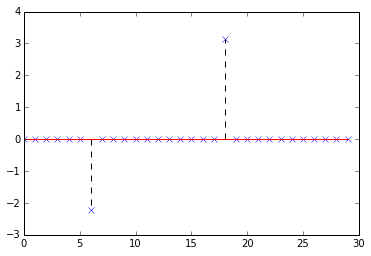

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n         =  30
x         =  np.zeros(n)
x[n*0.2]  = -np.sqrt(5) # 1.73
x[n*0.6]  =  np.pi      # 3.14

N = np.arange(n)
plt.stem(x, markerfmt='x', linefmt='k--')
plt.show()

### 2. linear measurement

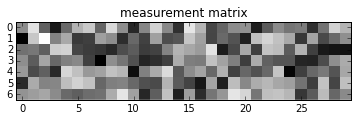

In [18]:
from CSToolbox.generator.random_matrix import gaussian

m  =  n*0.25 # number of measurement (10% of vector length)
A  =  gaussian(m,n)

plt.title('measurement matrix')
plt.imshow(A, cmap='gray', interpolation='none')
plt.show()

As mentioned before, we can not know $s$, we just can get inner products vector $y$ through linear measurement.

In [19]:
y = np.dot(A, x)
print y

[-1.59961413  0.52600426 -1.02018755  1.67921268  0.64082134 -2.97309366
  0.7491904 ]


### 3. sparse recovery

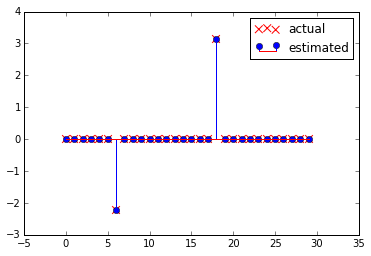

Converged
------- summary ------
[ CoSaMP ]
number of iterations: 1
specified error:   1.00e-05
residual norm (e): 2.20e-16



In [20]:
from CSToolbox.greedy.CoSaMP import CoSaMP

iterator = CoSaMP(A, y, 2)
iterator.set_maxiterations(5)

for z in iterator:
    plt.stem(z.real, label='estimated')
    plt.scatter(N, x, s=60, c='r', marker='x', label='actual')
    plt.legend()
    plt.show()